In [34]:
%matplotlib inline
#import keras
#keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None)

# Deep Learning

Redes profundas, activaciones y métodos de inicialización de pesos

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Comprueba los resultados que se obtienen para el problema `MNIST` en un MLP en función de los distintos métodos de inicialización de pesos utilizados (uniforme, lecun, glorot, he...) y las distintas funciones de activación de las capas ocultas (sigmoidal, tanh, relu...).

In [4]:
x_train.shape

(60000, 784)

In [15]:
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf

tf.Session(config=tf.ConfigProto(intra_op_parallelism_threads=4))

x = Input(shape=(784,))
layer = Dense(500, activation='relu', kernel_initializer='he_uniform')(x)
layer = Dense(500, activation='relu', kernel_initializer='he_uniform')(layer)
layer = Dense(500, activation='relu', kernel_initializer='he_uniform')(layer)
layer = Dense(500, activation='relu', kernel_initializer='he_uniform')(layer)
layer = Dense(500, activation='relu', kernel_initializer='he_uniform')(layer)
layer = Dense(500, activation='relu', kernel_initializer='he_uniform')(layer)
y = Dense(10, activation='sigmoid',kernel_initializer='he_uniform')(layer)
mlp = Model(x, y)

In [16]:
mlp.compile(optimizer='sgd',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [17]:
mlp.fit(x_train, y_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 15s 247us/step - loss: 1.3608 - acc: 0.6400 - val_loss: 0.5034 - val_acc: 0.8453
Epoch 2/50
60000/60000 [==============================] - 13s 220us/step - loss: 0.3895 - acc: 0.8852 - val_loss: 0.3182 - val_acc: 0.9113
Epoch 3/50
60000/60000 [==============================] - 15s 247us/step - loss: 0.2868 - acc: 0.9146 - val_loss: 0.2764 - val_acc: 0.9177
Epoch 4/50
60000/60000 [==============================] - 13s 221us/step - loss: 0.2392 - acc: 0.9294 - val_loss: 0.2370 - val_acc: 0.9308
Epoch 5/50
60000/60000 [==============================] - 12s 203us/step - loss: 0.2092 - acc: 0.9382 - val_loss: 0.2125 - val_acc: 0.9373
Epoch 6/50
60000/60000 [==============================] - 13s 225us/step - loss: 0.1856 - acc: 0.9447 - val_loss: 0.1763 - val_acc: 0.9469
Epoch 7/50
60000/60000 [==============================] - 13s 223us/step - loss: 0.1692 - acc: 0.9499 - val_loss: 0.

In [25]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_20 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_21 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_22 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_23 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_24 (Dense)             (None, 500)               250500    
__________

In [18]:
mlp.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 177us/step


[0.08573116897203145, 0.9738]

In [27]:
mlp.output

TypeError: 'Tensor' object is not callable

In [28]:
mlp.input

<tf.Tensor 'input_4:0' shape=(?, 784) dtype=float32>

In [30]:
mlp.get_config()

{'name': 'model_4',
 'layers': [{'name': 'input_4',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_4'},
   'inbound_nodes': []},
  {'name': 'dense_19',
   'class_name': 'Dense',
   'config': {'name': 'dense_19',
    'trainable': True,
    'units': 500,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 2.0,
      'mode': 'fan_in',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'inbound_nodes': [[['input_4', 0, 0, {}]]]},
  {'name': 'dense_20',
   'class_name': 'Dense',
   'config': {'name': 'dense_20',
    'trainable': True,
    'units': 500,
    'activation': 'relu',
    'use_bias': 

In [31]:
mlp.layers

In [32]:
mlp.get_weights()

[array([[ 0.05757392,  0.00577822, -0.04456669, ..., -0.02237792,
          0.01972058,  0.05646925],
        [ 0.03366603,  0.03467875,  0.05946267, ..., -0.08622029,
         -0.05280747, -0.07571422],
        [-0.01102216,  0.01458698, -0.03835053, ..., -0.06903136,
          0.06327005, -0.06848302],
        ...,
        [ 0.01980526, -0.07494288, -0.06455741, ..., -0.08665476,
         -0.0486192 , -0.06231457],
        [ 0.00976575, -0.02979329, -0.06669428, ..., -0.08334302,
         -0.01520452,  0.07704865],
        [-0.00409649, -0.01425438,  0.01177986, ...,  0.04386539,
          0.04090893,  0.03229975]], dtype=float32),
 array([ 1.02726920e-02, -3.51822725e-03,  1.73978247e-02,  8.17328040e-03,
        -1.26165600e-04,  5.23222983e-03,  1.35183378e-04,  2.30113566e-02,
         2.77076028e-02, -8.79746978e-04,  5.63107198e-03, -2.16532638e-03,
        -5.13120275e-03,  1.13992831e-02,  1.44808199e-02,  1.98177458e-03,
         2.34474451e-03,  5.10822283e-03,  1.18305031e

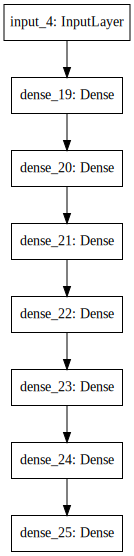

In [24]:

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(mlp).create(prog='dot', format='svg'))
#from keras.utils import plot_model
#plot_model(mlp, to_file='model.png', show_shapes=True)


In [22]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(mlp.history['acc'])
plt.plot(mlp.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(mlp.history['loss'])
plt.plot(mlp.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

TypeError: 'History' object is not subscriptable